In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Surpress Futurewarnings messages due to seaborn incompatibilities
warnings.filterwarnings("ignore",category=FutureWarning)

### Assignment

## Instructions

Complete the following exercises using Python.

1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome



[2 1 1 ... 2 2 1]


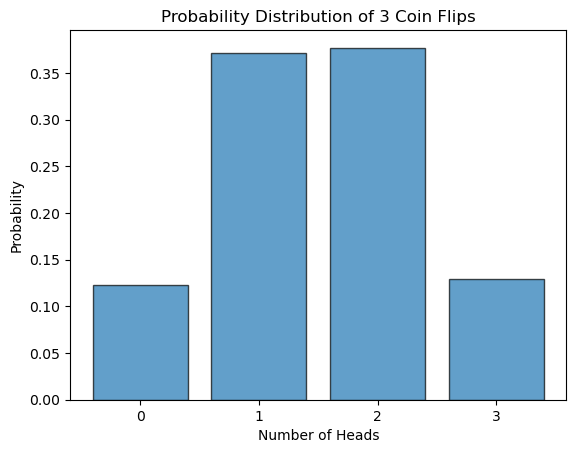

In [2]:
# 1. Generate 10,000 random samples of flipping 3 coins
n_flips = 3
p_heads = 0.5
samples = np.random.binomial(n_flips, p_heads, 10000)
print(samples)

# 2. Plot the probability distribution of getting 0, 1, 2, or 3 heads
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / len(samples)

plt.bar(values, probabilities, edgecolor='black', alpha=0.7)
plt.title('Probability Distribution of 3 Coin Flips')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.xticks(range(4))
plt.show()


In [3]:
# 3. Calculate the expected value (mean) of your distribution
empirical_mean = np.mean(samples)
theoretical_mean = n_flips * p_heads

print(f"Empirical Expected Value: {empirical_mean}")
print(f"Theoretical Expected Value: {theoretical_mean}")

Empirical Expected Value: 1.5128
Theoretical Expected Value: 1.5


In [4]:
# 4. Compare your empirical results with the theoretical probability for each outcome
theoretical_probs = {0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125}

print(f"{'Heads'} {'Empirical'} {'Theoretical'}")
for i in range(4):
    emp = probabilities[i]
    theo = theoretical_probs[i]
    print(f"{i}       {emp}      {theo}")

Heads Empirical Theoretical
0       0.1228      0.125
1       0.3709      0.375
2       0.377      0.375
3       0.1293      0.125


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples




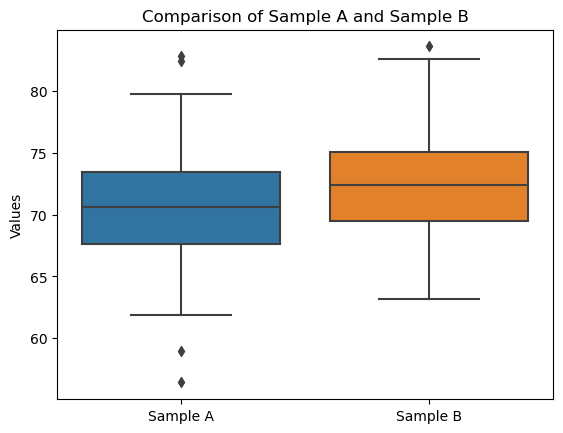

In [5]:
# 1. Generate two samples from normal distributions
sample_a = np.random.normal(loc=70, scale=5, size=100)
sample_b = np.random.normal(loc=73, scale=5, size=100)

#print(sample_a)
#print(sample_b)

# 2. Create a box plot comparing the two distributions
sns.boxplot(data=[sample_a, sample_b])
plt.xticks([0, 1], ['Sample A', 'Sample B'])
plt.title('Comparison of Sample A and Sample B')
plt.ylabel('Values')
plt.show()

T-statistic: -3.44010665
P-value    : 0.00070907
t-test: Means are significantly different

mean_a: 70.49862608370087
mean_b: 72.63802291646957
ci_a: (69.58341242549346, 71.41383974190828)
ci_b: (71.81031889851572, 73.46572693442342)


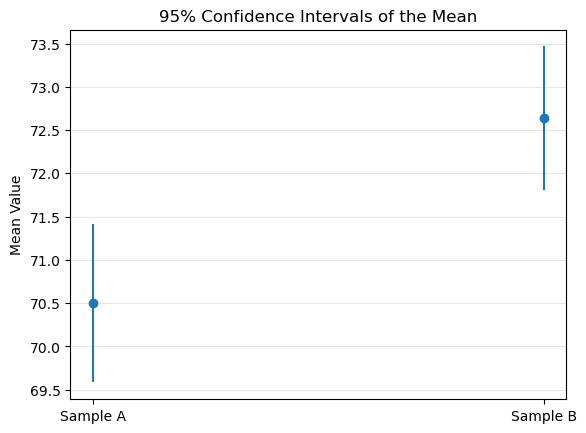

In [6]:
# 3. Conduct an independent t-test to determine if the means are significantly different
t_stat, p_value = st.ttest_ind(sample_a, sample_b)

print(f"T-statistic: {t_stat:.8f}")
print(f"P-value    : {p_value:.8f}")

alpha = 0.05
if p_value < alpha:
    print("t-test: Means are significantly different")
else:
    print("t-test: Means are not significantly different")

# 4. Calculate and visualize the 95% confidence intervals for both samples
def get_ci(data):
    mean = np.mean(data)
    sem = st.sem(data)
    ci = st.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean, ci

mean_a, ci_a = get_ci(sample_a)
mean_b, ci_b = get_ci(sample_b)

print()
print (f"mean_a: {mean_a}")
print (f"mean_b: {mean_b}")
print (f"ci_a: {ci_a}")
print (f"ci_b: {ci_b}")

plt.errorbar(x=['Sample A', 'Sample B'], 
             y=[mean_a, mean_b], 
             yerr=[[mean_a - ci_a[0], mean_b - ci_b[0]], 
                   [ci_a[1] - mean_a, ci_b[1] - mean_b]], 
             fmt='o', )
plt.title('95% Confidence Intervals of the Mean')
plt.ylabel('Mean Value')
plt.grid(axis='y', alpha=0.3)
plt.show()

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.



In [7]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
def analyze_relationship(df, x_col, y_col):
    # 1. Create Scatter Plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relationship: {x_col} vs {y_col}')
    plt.show()

    # 2. Calculate Pearson correlation and p-value
    corr, p_value = st.pearsonr(df[x_col], df[y_col])
    
    # 3. Calculate R-squared
    r_squared = corr**2
    
    print(f"Analysis for {x_col} and {y_col}:")
    print(f"Pearson Correlation (r): {corr:.8f}")
    print(f"P-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}")
    print(f"Interpretation: {r_squared*100:.2f}% of the variance in {y_col} "
          f"is explained by {x_col}.\n")
    
    return corr

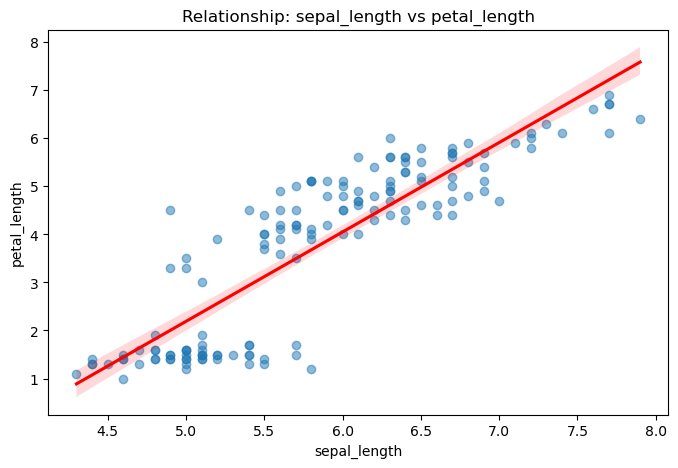

Analysis for sepal_length and petal_length:
Pearson Correlation (r): 0.87175378
P-value: 0.00000000
R-squared: 0.75995465
Interpretation: 76.00% of the variance in petal_length is explained by sepal_length.



In [12]:
r1 = analyze_relationship(iris, 'sepal_length', 'petal_length')

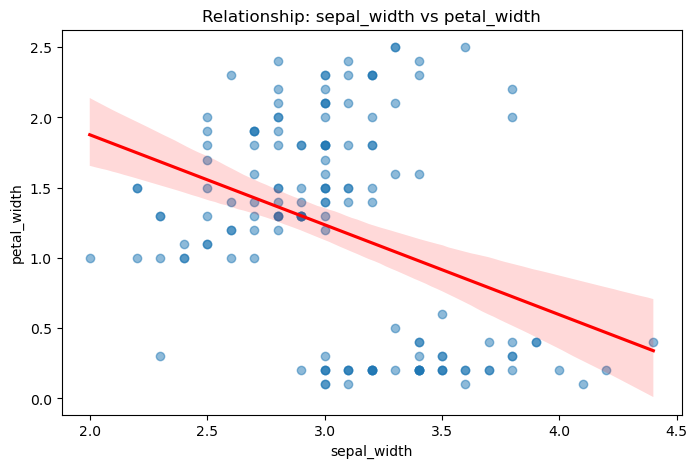

Analysis for sepal_width and petal_width:
  Pearson Correlation (r): -0.36612593
  P-value: 0.00000407
  R-squared: 0.13404820
  Interpretation: 13.40% of the variance in petal_width is explained by sepal_width.



In [10]:
r2 = analyze_relationship(iris, 'sepal_width', 'petal_width')

#### Which pair shows a stronger relationship? Explain why.
##### Ans: 
The relationship between sepal_length and petal_length is stronger
The Pearson correlation sepal_length and petal_length '0.8717' is much closer to 1.0 than the sepal_width and petal_width value '0.3661'